# 1.4 Funções de ativação
Como já vimos redes neurais precisam de funções de ativação para não colapsarem em uma simples multiplicação de matrizes. Porém a decisão de qual função de ativação usar é longe de trivial, por isso nessa seção vamos mostrar um conjunto de funções de ativação e suas propriedades

#### Dependências

In [2]:
# Gráficos
import matplotlib.pyplot as plt

# Matemática + manipulação de vetores
import math
import numpy as np

# "Fixar" números aleatórios gerados
np.random.seed(0)

# Utilidades
import utils

# Recarregar automaticamente dependências caso elas mudem
%load_ext autoreload
%autoreload 2

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
x = np.linspace(-10, 10)

In [4]:
def plot_line(ax, x, y, *args, **kwargs):
    ax.plot(x, y, *args, **kwargs)
    
def plot_activation_vis(f, x, name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
    
    
    # função de activação
    y = f(x)
    ax1.set_title('Funcao de ativacao: ' + name)
    plot_line(ax1, x, y)
    
    # derivada
    dy = f(x, derivative=True)
    ax2.set_title('Derivada da Funcao de ativacao: ' + name)
    plot_line(ax2, x, dy)
    
    plt.show()

## Sem ativação (Linear)
... e sem comentários

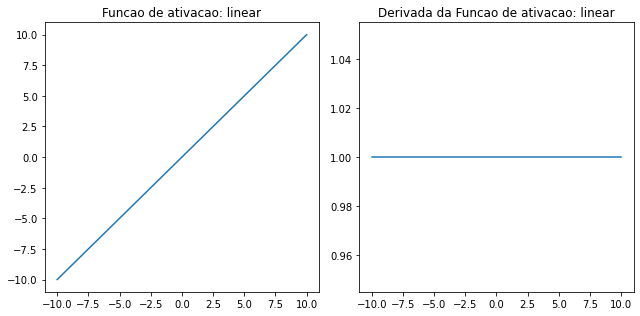

In [5]:
def linear(x, derivative=False):
    if derivative:
        return np.ones(len(x))
    return x

plot_activation_vis(linear, x, 'linear')

## ReLU
A ReLU é atualmente a função de ativação mais comumente usada para as camadas internas de redes neurais. Ela tem uma série de propriedades úteis, como ser barata de computar e ter um gradiente constante para valores positivos.
![](https://cdn-images-1.medium.com/max/1600/1*ZD5kma5J-6UabfEwERv_dQ.png)

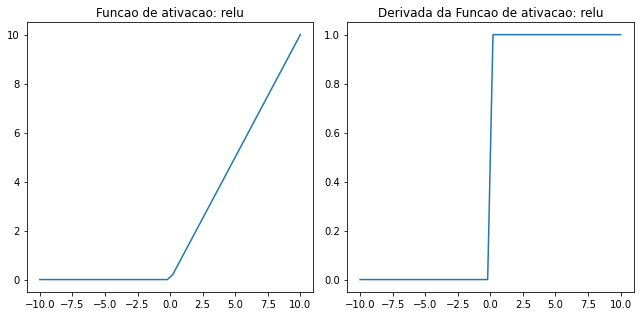

In [6]:
def relu(x, derivative=False):
    if derivative:
        return np.where(relu(x) > 0, 1, 0)
    return np.where(x > 0, x, 0)

plot_activation_vis(relu, x, 'relu')

## SELU
SELU é Scaled Exponential Linear Function, é uma função que aproxima a ReLU, porém ela não tem um gradiente nulo nos números negativos, evitando o problema da "ReLU morta". 
![](https://cdn-images-1.medium.com/max/1600/1*Q_lez8e2mP7MdSZf-O5bKw.png)

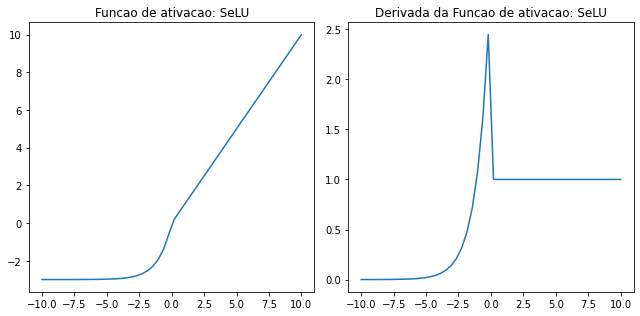

In [7]:
def selu(x, alpha=3, derivative=False):
    if derivative:
        return np.where(selu(x) > 0, 1, alpha * np.exp(x))
    return np.where(x > 0, x, alpha * np.exp(x) - alpha)

plot_activation_vis(selu, x, 'SeLU')

## Sigmoid
A função sigmoíde costumava ser a mais usada para as camadas internas antigamente, em especial por ter interpretações matemáticas e biológicas. Hoje em dia ainda é usada na camada final para classificação binária

Porém a sigmóide tem um sério problema com seus gradientes, eles são extremamente pequenos fora do intervalo [-2, 2], e mesmo nesse intervalos não são muito altos, assim o treinamento de redes neurais profundas se torna muito lento ou até mesmo impossível, o "vanishing gradient problem".

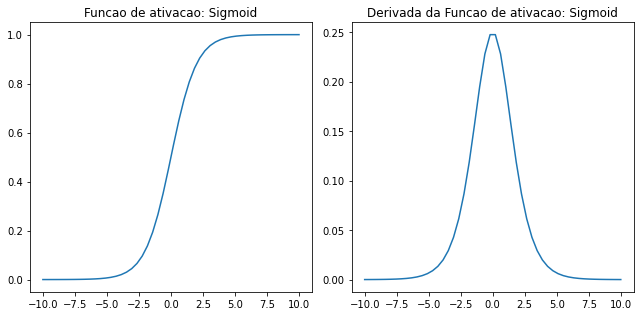

In [8]:
def sigmoid(x, derivative=False):
    if derivative:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.e ** (-x))

plot_activation_vis(sigmoid, x, 'Sigmoid')

## Softmax
Softmax é uma função multivariada, ou seja ela recebe vários argumentos de entrada. O propósito dela é gerar uma distribuição de probabilidade a partir de um conjunto de valores. Desse modo ela é usada na camada final de uma rede neural quando queremos fazer classificação multiclasse.

Para transformarmos os valores em probabilidades fazemos os seguintes passos:
1. Exponenciamos os valores, garantindo que todos se tornem positivos (e que se $x_i > x_j$, $\exp(x_i) > \exp(x_j)$ ). 
2. Depois dividimos cada exponencial pela soma das exponenciais, garantindo que a soma dos termos finais seja 1.

Às vezes usam um parâmetro chamado temperatura, que suaviza a diferença entre as probabilidades.

[-2 -1  0  1  2]


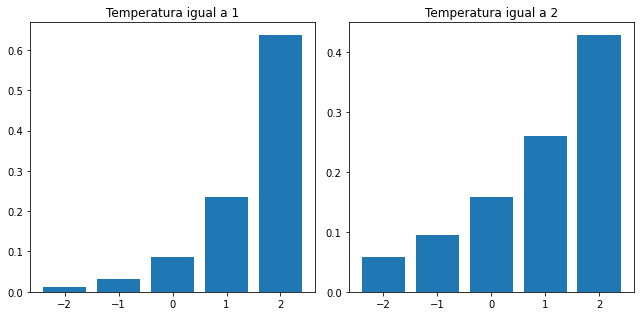

In [17]:
def softmax(x, temperature=1):
    exps = np.exp(x/temperature)
    return exps/np.sum(exps)

x = np.arange(5) - 2
print(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
y = softmax(x)
ax1.set_title('Temperatura igual a 1')
ax1.bar(x, y)

y = softmax(x, 2)
ax2.set_title('Temperatura igual a 2')
ax2.bar(x, y)
plt.show()

## Tanh
Tem um formato e propriedades bastante semelhantes à sigmóide, porém seus valores variam entre -1 e 1, e seu gradiente é significativamente maior

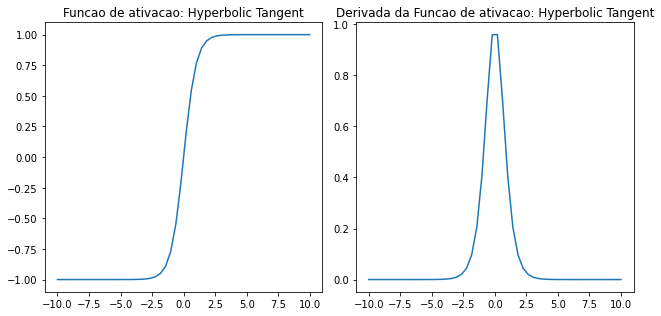

In [10]:
def tanh(x, derivative=False): #ela já está implementada no numpy
    if derivative:
        return 1 - tanh(x)**2
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
plot_activation_vis(tanh, x, 'Hyperbolic Tangent')

![](https://cdn-images-1.medium.com/max/1600/1*DRKBmIlr7JowhSbqL6wngg.png)
Imagem de: https://medium.com/machine-learning-world/how-to-debug-neural-networks-manual-dc2a200f10f2